# Map FeatureCollection

The `geetools` extension contains a set of functions for rendering maps from `ee.FeatureCollection` objects. Use the following function descriptions and examples to determine the best function and chart type for your purpose.

In [1]:
import ee, pytest_gee, os

if "EARTHENGINE_SERVICE_ACCOUNT" in os.environ:
    pytest_gee.init_ee_from_service_account()
elif "EARTHENGINE_PROJECT" in os.environ:
    pytest_gee.init_ee_from_token()
else:
    raise ValueError("Cannot authenticate with Earth Engine.")

[![github](https://img.shields.io/badge/-see%20sources-white?logo=github&labelColor=555)](https://github.com/gee-community/geetools/blob/main/docs/usage/plot/map-featurecollection.ipynb)
[![colab](https://img.shields.io/badge/-open%20in%20colab-blue?logo=googlecolab&labelColor=555)](https://colab.research.google.com/github/gee-community/geetools/blob/main/docs/usage/plot/map-featurecollection.ipynb)

## Set up environment

Install all the required packages and perform the import statement upstream.

In [2]:
# uncomment if installation of libs is necessary
# !pip install earthengine-api geetools

In [3]:
from IPython.display import display
from matplotlib import pyplot as plt

import ee
import geetools #noqa: F401

In [4]:
# uncomment if authetication to GEE is needed
# ee.Authenticate()
# ee.Intialize(project="<your_project>")

## Example data 

The following examples rely on a `ee.FeatureCollection` composed of all the hydroshed bassins from south america.

In [5]:
region = ee.Geometry.BBox(-80, -60, -20, 20);
fc = ee.FeatureCollection('WWF/HydroATLAS/v1/Basins/level04').filterBounds(region)

## Map Vector

```{api}
{docstring}`ee.FeatureCollection.geetools.plot`
```

An `ee.FeatureCollection` is a vector representation of geographical properties. A user can be interested by either the property evolution across the landscape or the geometries associated with it. The {py:meth}`plot <geetools.FeatureCollection.FeatureCollectionAccessor.plot>` is coverinig both use cases. 

### Map a property

A single property can be ploted on a map using matplotlib. The following example is showing the bassin area in km².

First create a matplotlib figure and axis:


In [6]:
plt.ioff() # remove interactive for the sake of the example
fig, ax = plt.subplots(figsize=(10, 10))

Then you can add the bassins to the map using the `plot` method. By default it will display the first property of the features. In our case we will opt to display the area of the bassins in km² i.e. the "UP_AREA" property.

In [7]:
fc.geetools.plot(ax=ax, property="UP_AREA", cmap="viridis")

Now that we have the plot, we can customize it with matplotlib. For example, we can add a title and a colorbar.

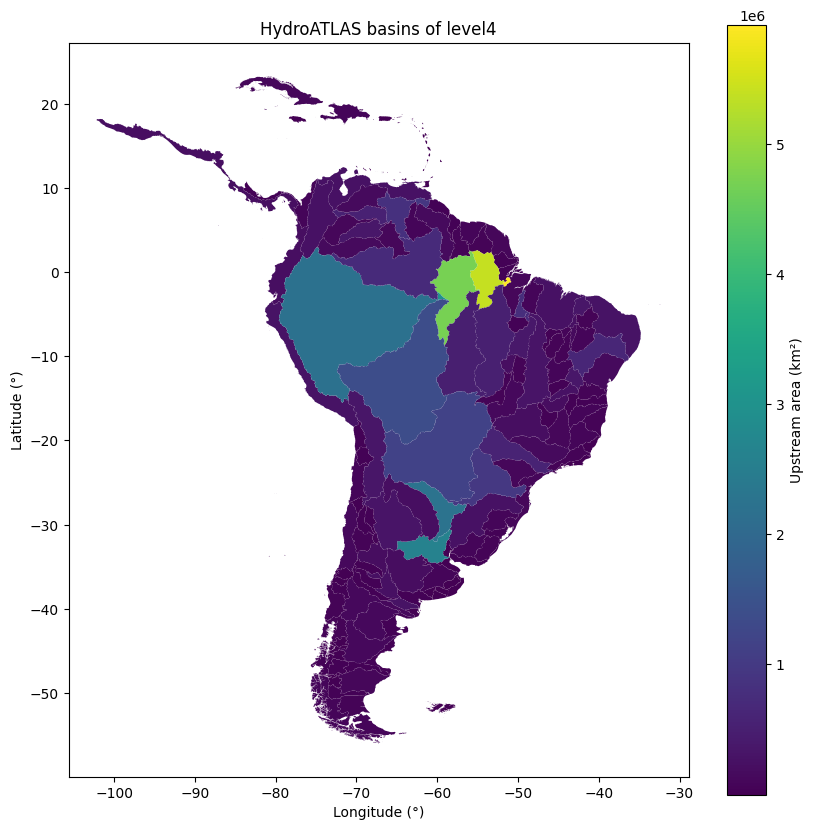

In [8]:
# you can then customize the figure as you would for any other matplotlib object
fig.colorbar(ax.collections[0], label="Upstream area (km²)")
ax.set_title("HydroATLAS basins of level4")
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

display(fig)

### Map geometries

Alternatively if you only want to plot the geometries of the featurecollection on a map, you can use the `plot` method with the `boundares` parameter set to `True`.

Similarly to the previous example we start by creating a pyplot figure and axis:

In [9]:
plt.ioff() # remove interactive for the sake of the example
fig, ax = plt.subplots(figsize=(10, 10))

Then you can start plotting the geometries:

In [10]:
fc.geetools.plot(ax=ax, boundaries=True)

and finally customize the plot:

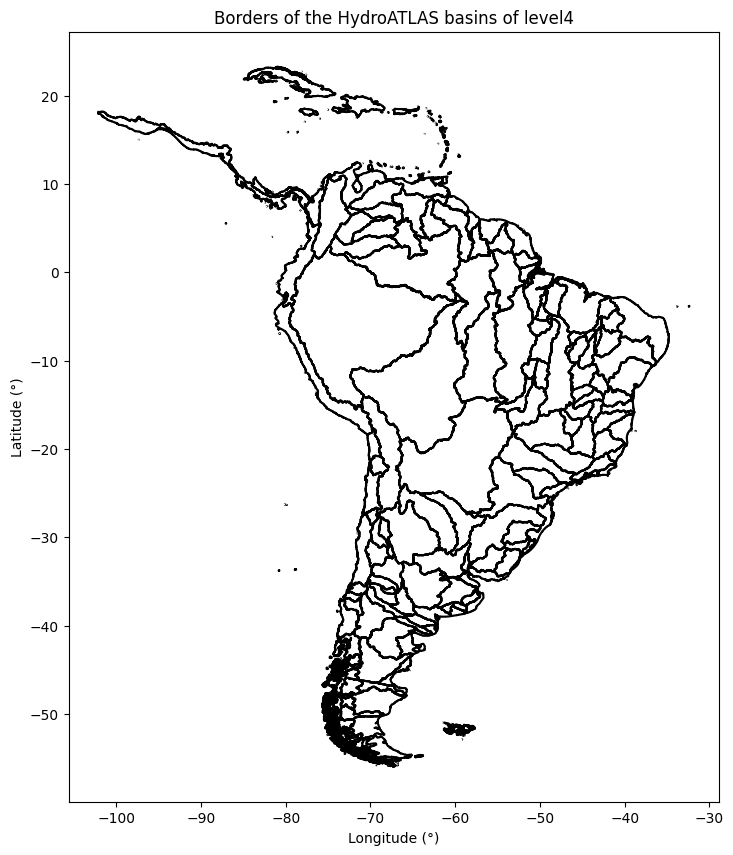

In [11]:
# you can then customize the figure as you would for any other matplotlib object
ax.set_title("Borders of the HydroATLAS basins of level4")
ax.set_xlabel("Longitude (°)")
ax.set_ylabel("Latitude (°)")

display(fig)